<a href="https://colab.research.google.com/github/Jotavenom/Tool/blob/main/Dominios_de_la_porteina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!cd /content/drive/MyDrive/Colab Notebooks/Datasets

# Instalamos Biopython, una librería para trabajar con datos biológicos
!pip install biopython

# Importamos los módulos necesarios
from Bio import Entrez, SeqIO

# NCBI requiere que se proporcione un correo electrónico para usar Entrez
Entrez.email = "jmantilla.symbiotech@gmail.com"  # Reemplaza con tu correo

# Definimos el número de acceso de la secuencia que queremos recuperar
accession = "XFD46705.1" # SVMPs


# Usamos Entrez para obtener la secuencia en formato FASTA
handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
handle.close()

# Guardamos la secuencia en un archivo FASTA local
SeqIO.write(record, "/content/drive/MyDrive/ColabNotebooks/Datasets", "fasta")

# Mostramos información básica de la secuencia
print("ID:", record.id)
print("Descripción:", record.description)
print("Longitud:", len(record.seq))
print("Secuencia 610 aa:", record.seq[:610])



/bin/bash: line 1: cd: too many arguments


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/ColabNotebooks/Datasets'

In [ ]:
# Importamos módulos para trabajar con secuencias
from Bio import SeqIO
from Bio.Seq import Seq


# Leemos la secuencia guardada en el archivo FASTA
registro = SeqIO.read("/content/drive/MyDrive/Colab Notebooks/Datasets/mi_smvps.fasta", "fasta")

# Convertimos la secuencia (string) a una lista de caracteres para poder editarla
seq_list = list(str(registro.seq))

# Realizamos una mutación en la posición 100 (cambiamos el aminoacido por 'L')
seq_list[100] = "L"

# Reconstruimos la secuencia de caracteres a una cadena de texto (string) como objeto Seq
secuencia_mutada = Seq("".join(seq_list))

# Mostramos todos los 610 aa de la secuencia mutada
print("Secuencia mutada (610aa):", secuencia_mutada[:610])


Secuencia mutada (610aa): MIQVLLVTICLAAFPYQGSSIILESGNVNDYEVVYPRKVTALPKGAVQPKYEDTMQYEFKVNGEPVVLHLEKNKGLFSKDYSETHYSPDGREITTYPPVELHCYYHGRIENDADSTASISACNGLKGHFKLQRETYFIEPLKLSNSEAHAVYKYENVKKEDEAPKMCGVTQNWKSFEPINKASQFVVTAEQQRYDPYRYVEFFIVVDQGMVTKNNGDLDKIKARMYELANIVNEIFRYLYMHAALVGLEIWSNGDKITVKPDVDYTLNSFAEWRKTDLLTRKKHDNAQLLTAIDFNGPTIGYAYIGSMCHPKRSVAIVEDYSPINLVVAVIMAHEMGHNLGIHHDTGSCSCGDYPCIMGPTISNEPSKFFSNCSYIQCWDFIMNHNPECIVNEPFGTDIISPPVCGNELLEVGEECDCGTPENCQNECCDAATCKLKSGSQCGHGDCCEQCKFTKSGTECRASMSECDPAEHCTGQSSECPADVFHKNGKPRLNNYGYCYNGNCPIMYHQCYALFGADVYEAEDSCFKDNQKSNYYGYCRKENGKKIPCAPEDVKCGRLYCKDNSPGQNNPCKMFYSSDDEHKGMVLPGTKCADGKVCSNGHCVDVATAY


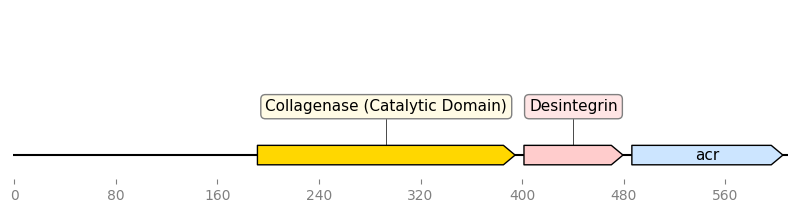

In [ ]:
# Instalamos la librería para visualizar secuencias con anotaciones
!pip install dna_features_viewer

# Importamos los módulos necesarios
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt

# Creamos anotaciones ficticias sobre la secuencia
features = [
    GraphicFeature(start=192, end=395, strand=+1, color="#ffd700", label="Collagenase (Catalytic Domain)"),
    GraphicFeature(start=402, end=480, strand=+1, color="#ffcccc", label="Desintegrin"),
    GraphicFeature(start=487, end=606, strand=+1, color="#cce5ff", label="acr")

]

# Creamos el gráfico con las anotaciones
record = GraphicRecord(sequence_length=len(secuencia_mutada), features=features)
ax, _ = record.plot(figure_width=10)
plt.show() # Mostramos el gráfico


In [ ]:
# Importamos el módulo para crear un nuevo registro de secuencia
from Bio.SeqRecord import SeqRecord

# Creamos un nuevo objeto SeqRecord con la secuencia mutada
registro_editado = SeqRecord(
    secuencia_mutada,
    id="Editado_NCBI",
    description="Secuencia con mutación en posición 100"
)

# Guardamos la secuencia editada en un nuevo archivo FASTA
with open("/content/drive/MyDrive/Colab Notebooks/Output/mi_smvpmodif.fasta", "w") as output_handle:
    SeqIO.write(registro_editado, output_handle, "fasta")

# Confirmamos que el archivo fue guardado
print("Secuencia editada guardada como '/content/drive/MyDrive/Colab Notebooks/Output/mi_smvpmodif.fasta'")


Secuencia editada guardada como '/content/drive/MyDrive/Colab Notebooks/Output/mi_smvpmodif.fasta'
